# Classification Exercise

We'll be working with some California Census Data, we'll be trying to use various features of an individual to predict what class of income they belogn in (>50k or <=50k). 

Here is some information about the data:

<table>
<thead>
<tr>
<th>Column Name</th>
<th>Type</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>age</td>
<td>Continuous</td>
<td>The age of the individual</td>
</tr>
<tr>
<td>workclass</td>
<td>Categorical</td>
<td>The type of employer the  individual has (government,  military, private, etc.).</td>
</tr>
<tr>
<td>fnlwgt</td>
<td>Continuous</td>
<td>The number of people the census  takers believe that observation  represents (sample weight). This  variable will not be used.</td>
</tr>
<tr>
<td>education</td>
<td>Categorical</td>
<td>The highest level of education  achieved for that individual.</td>
</tr>
<tr>
<td>education_num</td>
<td>Continuous</td>
<td>The highest level of education in  numerical form.</td>
</tr>
<tr>
<td>marital_status</td>
<td>Categorical</td>
<td>Marital status of the individual.</td>
</tr>
<tr>
<td>occupation</td>
<td>Categorical</td>
<td>The occupation of the individual.</td>
</tr>
<tr>
<td>relationship</td>
<td>Categorical</td>
<td>Wife, Own-child, Husband,  Not-in-family, Other-relative,  Unmarried.</td>
</tr>
<tr>
<td>race</td>
<td>Categorical</td>
<td>White, Asian-Pac-Islander,  Amer-Indian-Eskimo, Other, Black.</td>
</tr>
<tr>
<td>gender</td>
<td>Categorical</td>
<td>Female, Male.</td>
</tr>
<tr>
<td>capital_gain</td>
<td>Continuous</td>
<td>Capital gains recorded.</td>
</tr>
<tr>
<td>capital_loss</td>
<td>Continuous</td>
<td>Capital Losses recorded.</td>
</tr>
<tr>
<td>hours_per_week</td>
<td>Continuous</td>
<td>Hours worked per week.</td>
</tr>
<tr>
<td>native_country</td>
<td>Categorical</td>
<td>Country of origin of the  individual.</td>
</tr>
<tr>
<td>income</td>
<td>Categorical</td>
<td>"&gt;50K" or "&lt;=50K", meaning  whether the person makes more  than \$50,000 annually.</td>
</tr>
</tbody>
</table>

## Follow the Directions in Bold. If you get stuck, check out the solutions lecture.

### THE DATA

** Read in the census_data.csv data with pandas**

In [279]:
import pandas as pd

In [280]:
census = pd.read_csv('census_data.csv')

In [281]:
census.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Exploring the data

Things to notice about our new data:
* Number of rows and columns
* Number of continuous variables and their stats
* Number of categorical variables and number of unique values in each
* Missing values
* Correlation between variables

In [282]:
import locale
locale.setlocale(locale.LC_NUMERIC, 'en_US.UTF-8')

'en_US.UTF-8'

#### Number of rows and columns

In [283]:
nor = locale.format('%d',len(census), True)
print('The data set has %s records.' %(nor))

The data set has 32,561 records.


In [284]:
noc = len(census.columns)
print('The data set has %s columns.' %(noc))

The data set has 14 columns.


In [285]:
census.dtypes

age                int64
workclass         object
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
gender            object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income_bracket    object
dtype: object

#### Number of continuous variables and their stats

In [286]:
import matplotlib.pyplot as plt
%matplotlib inline

In [287]:
num_cols = census.select_dtypes('int64').columns

In [288]:
print('There are %d numeric columns: '%(len(num_cols)), '\n', list(num_cols))

There are 5 numeric columns:  
 ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [289]:
census.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


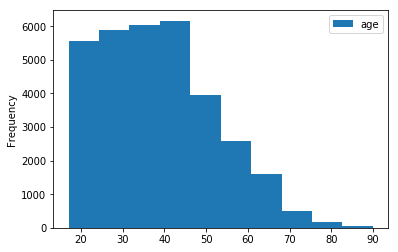

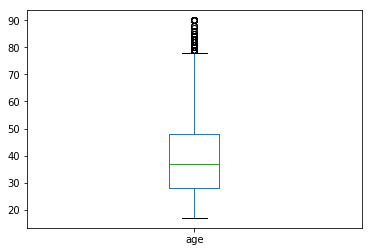

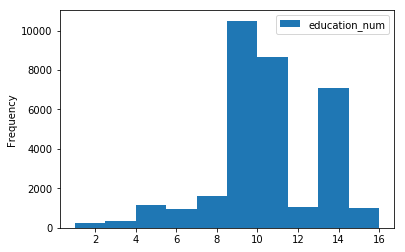

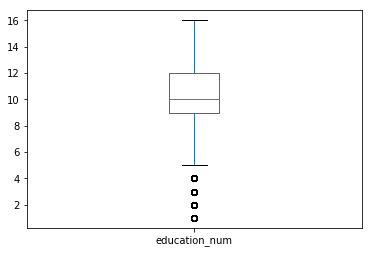

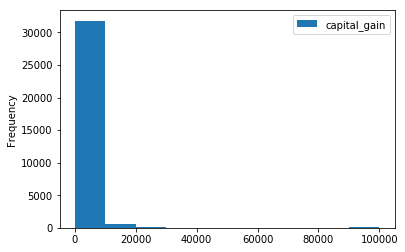

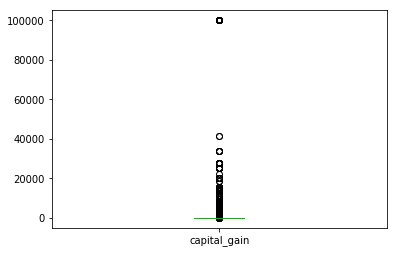

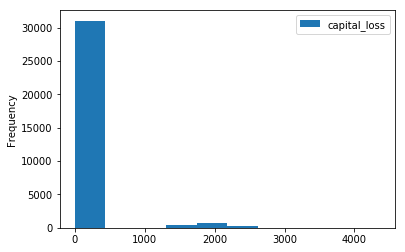

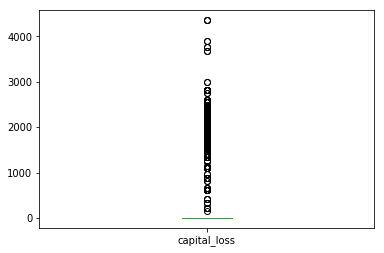

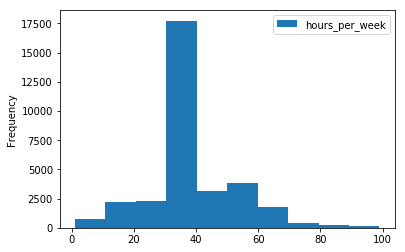

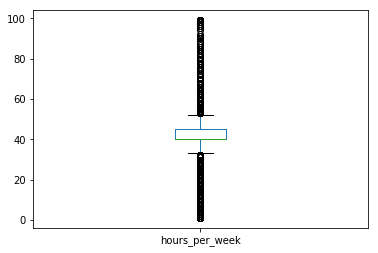

In [290]:
plot_num = 0
for num_col in num_cols:
    plot_num += 1
    plt.figure(plot_num)
    census[num_col].plot(kind='hist', legend=True)
    plot_num += 1
    plt.figure(plot_num)
    census[num_col].plot(kind='box')

#### Number of categorical variables and number of unique values in each

In [374]:
cat_cols = census.select_dtypes('object').columns

In [292]:
cat_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'native_country', 'income_bracket'],
      dtype='object')

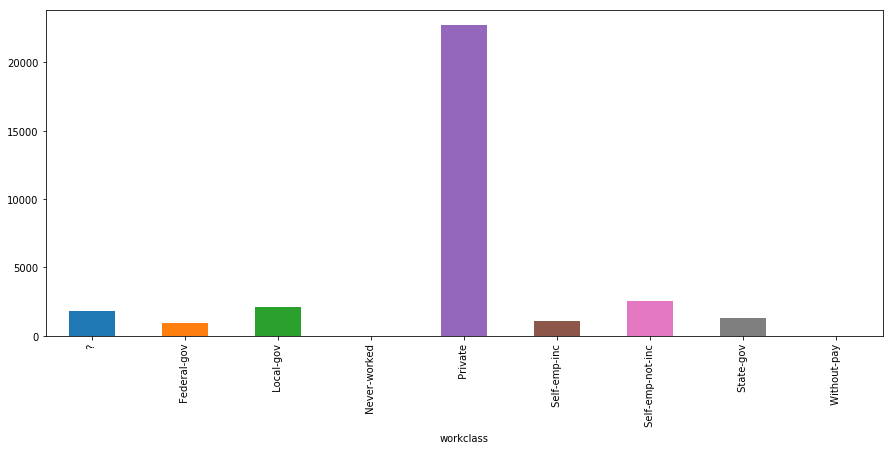

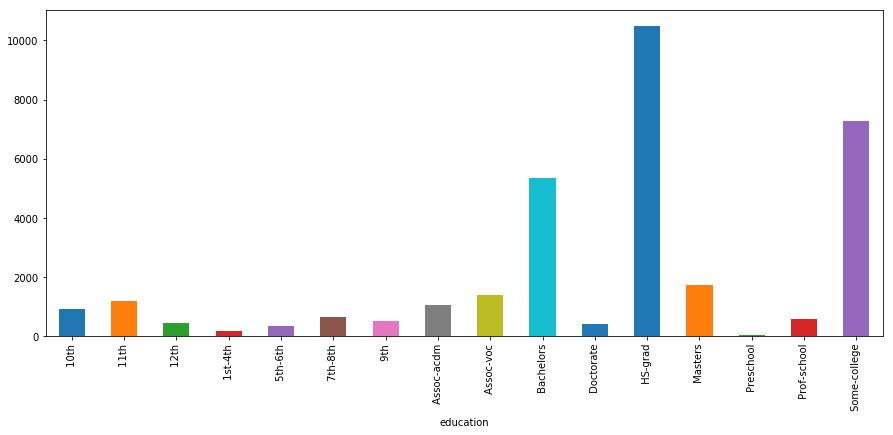

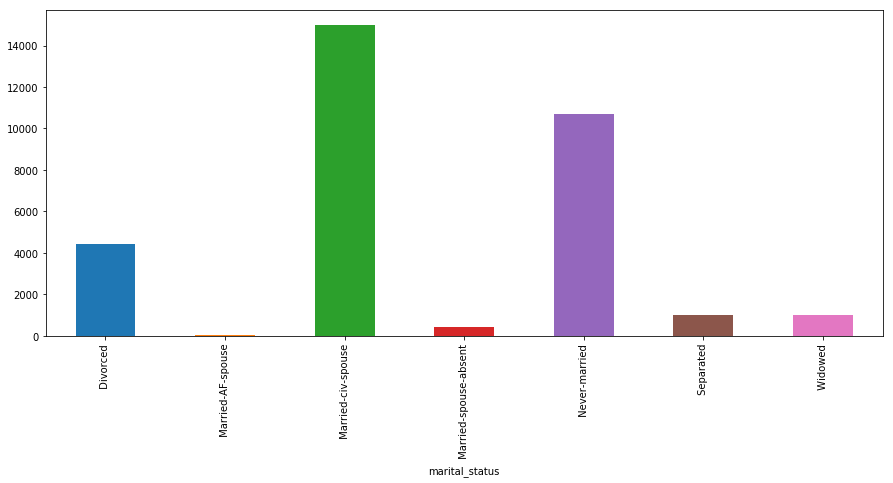

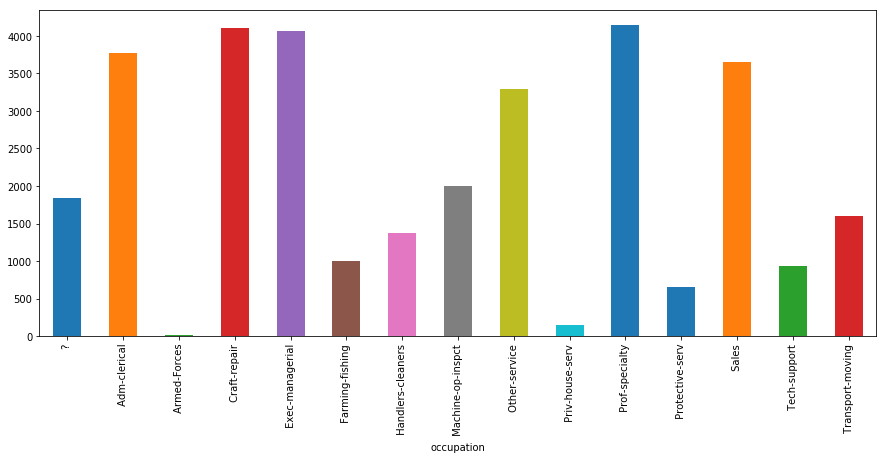

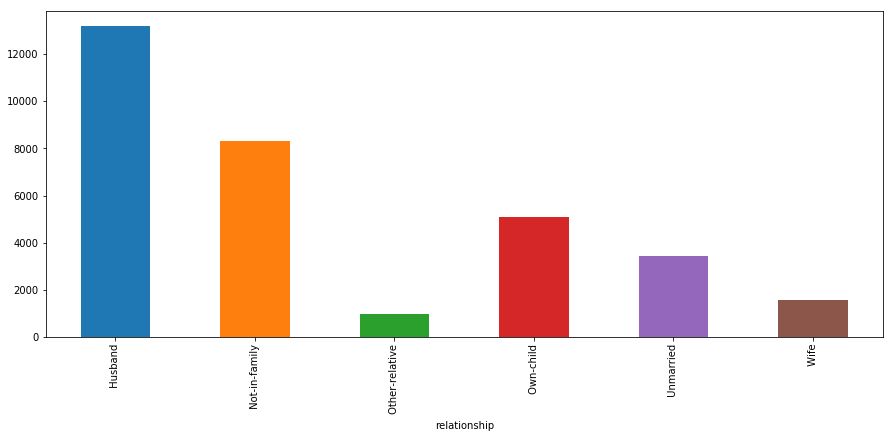

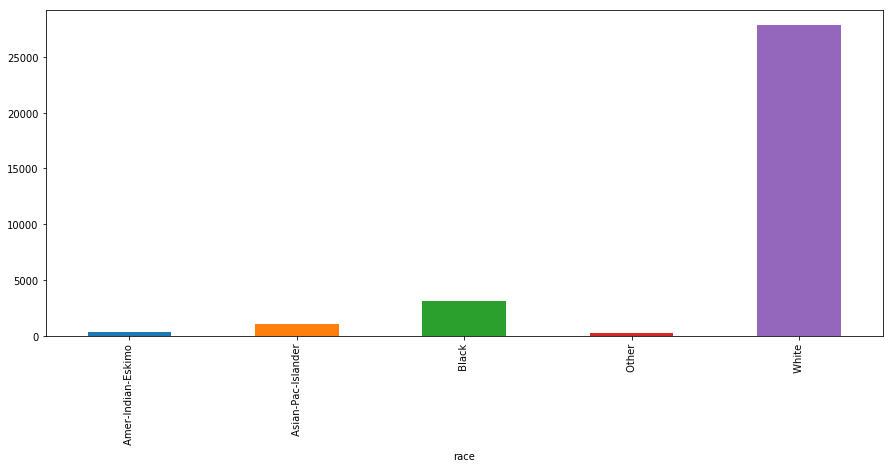

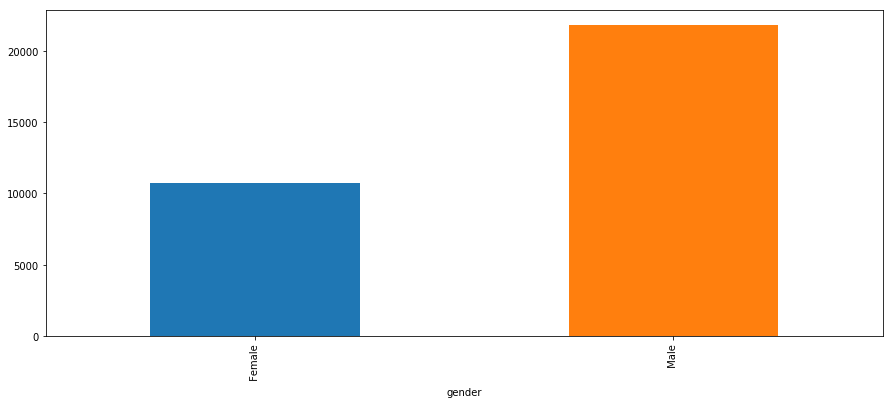

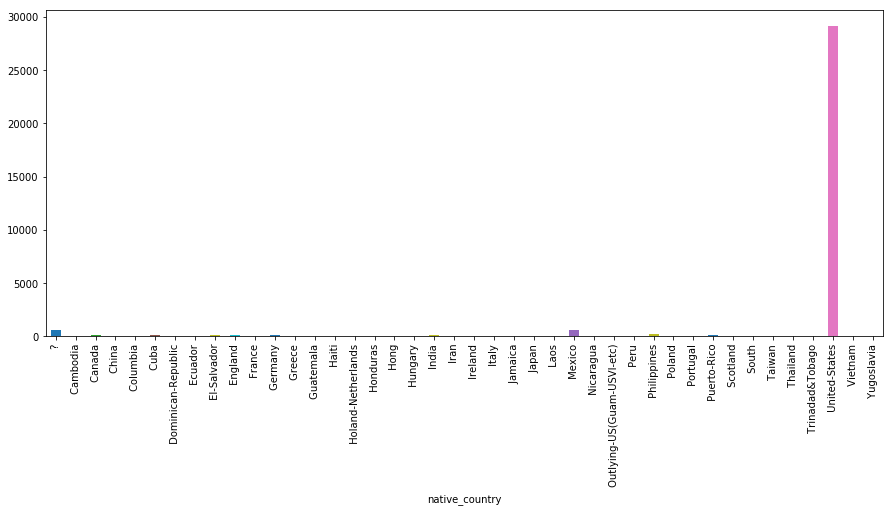

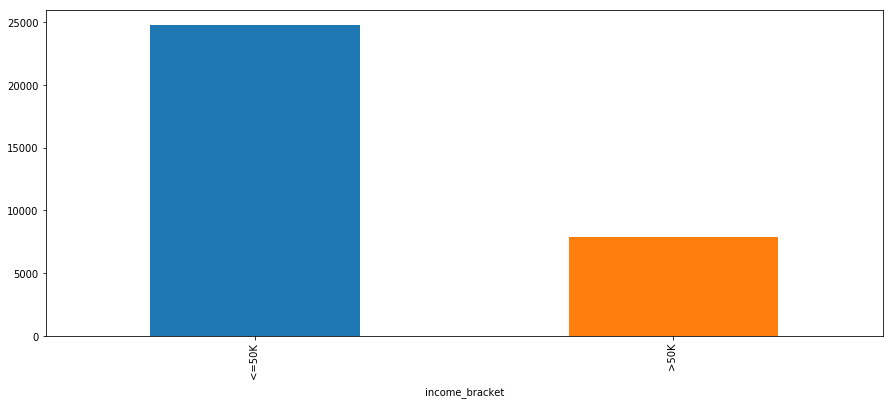

In [293]:
plot_num = 0
for cat_col in cat_cols:
    plot_num += 1
    plt.figure(cat_col, figsize=(15,6))
    census.groupby(by=cat_col).count()['age'].plot(kind='bar')

#### Missing values

In [294]:
null_data = census[census.isnull().any(axis=1)]

In [295]:
null_data

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket


In [296]:
len(census[census['native_country'] == ' ?'])

583

In [297]:
len(census[census['occupation'] == ' ?'])

1843

In [298]:
len(census[census['workclass'] == ' ?'])

1836

#### Correlation between variables

In [299]:
cor_mat = pd.DataFrame(census.corr())

In [300]:
cor_mat

,age,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,0.036527,0.077674,0.057775,0.068756
education_num,0.036527,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,0.148123,0.078409,0.054256,1.000000


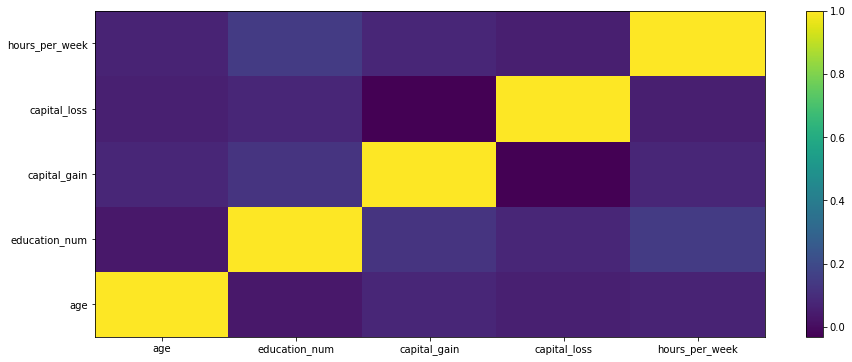

In [301]:
import numpy as np
plt.figure(figsize=(15,6))
plt.yticks(np.arange(0.5, len(cor_mat.index), 1), cor_mat.index, )
plt.xticks(np.arange(0.5, len(cor_mat.columns), 1), cor_mat.columns)
plt.pcolor(cor_mat)
plt.colorbar()

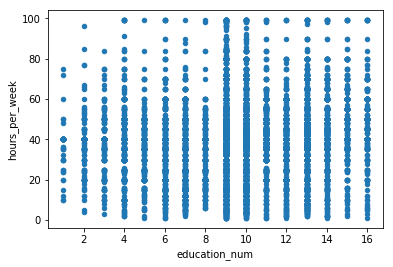

In [302]:
census.plot('education_num', 'hours_per_week', kind='scatter')

In [303]:
census['education_num_str'] = census['education_num'].astype('str').apply(lambda x: x.zfill(2))
census['education_level'] = census['education_num_str'] + census['education']

In [304]:
cross = pd.crosstab(census['education_level'],
                    census['race'],
                    normalize='columns')

In [305]:
cross

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
education_level,,,,,
01 Preschool,0.000000,0.005775,0.001601,0.007380,0.001366
02 1st-4th,0.012862,0.004812,0.005122,0.033210,0.004817
03 5th-6th,0.006431,0.017324,0.006722,0.047970,0.010030
04 7th-8th,0.028939,0.010587,0.017926,0.062731,0.019881
05 9th,0.016077,0.008662,0.028489,0.029520,0.014488
06 10th,0.051447,0.012512,0.042574,0.033210,0.027394
07 11th,0.045016,0.020212,0.048976,0.036900,0.035124
08 12th,0.016077,0.008662,0.022407,0.051661,0.012043
09 HS-grad,0.382637,0.217517,0.375800,0.287823,0.320104


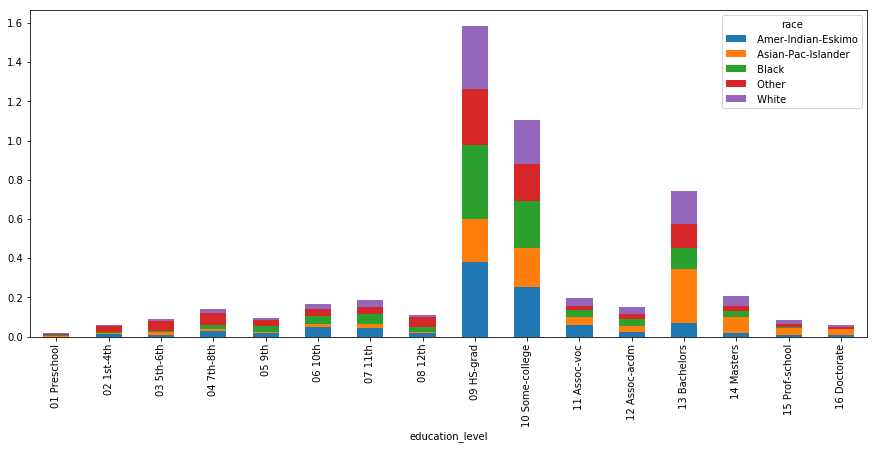

In [306]:
cross.plot.bar(stacked=True, figsize=(15, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1333e4ef0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13339b0b8>]], dtype=object)

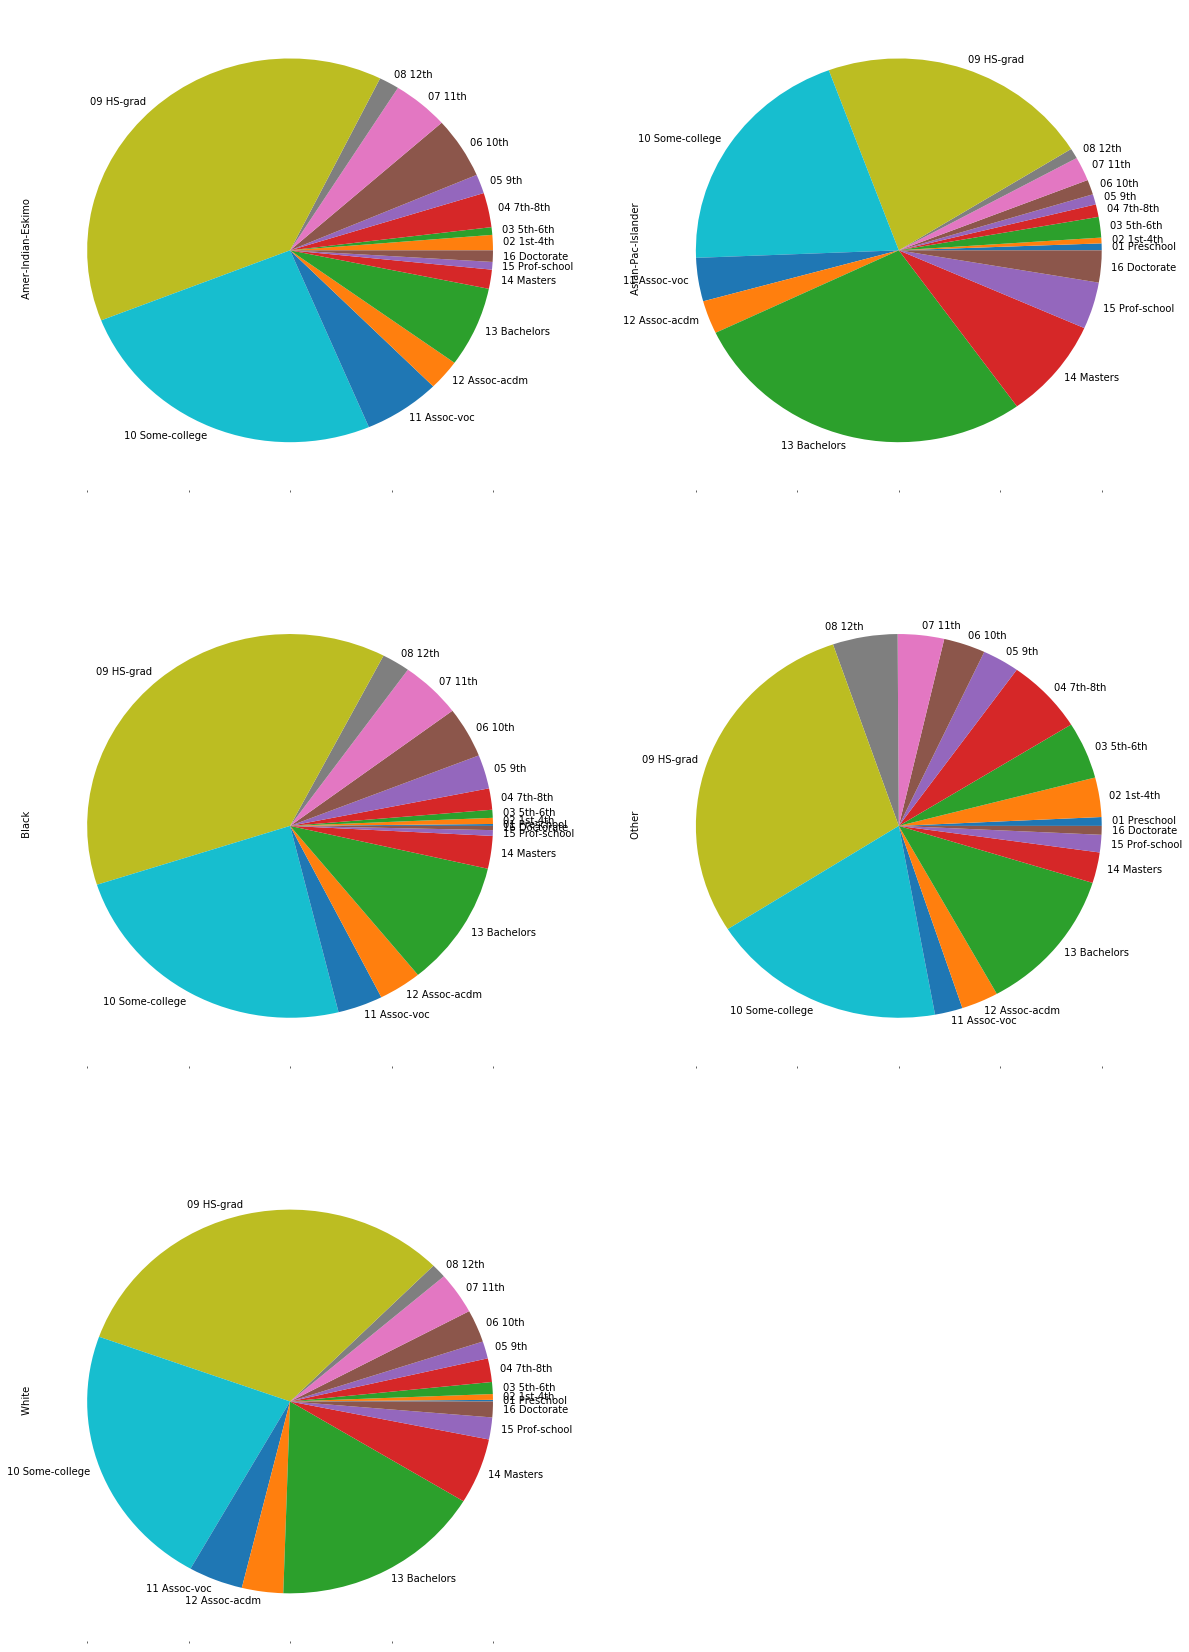

In [307]:
cross.plot.pie(subplots=True, figsize=(20, 30), layout=(3, 2), legend=False, startangle=0, labeldistance=1.05)

In [308]:
census.groupby(['education_num', 'education']).count()

,,age,workclass,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,education_num_str,education_level
education_num,education,,,,,,,,,,,,,,
1,Preschool,51,51,51,51,51,51,51,51,51,51,51,51,51,51
2,1st-4th,168,168,168,168,168,168,168,168,168,168,168,168,168,168
3,5th-6th,333,333,333,333,333,333,333,333,333,333,333,333,333,333
4,7th-8th,646,646,646,646,646,646,646,646,646,646,646,646,646,646
5,9th,514,514,514,514,514,514,514,514,514,514,514,514,514,514
6,10th,933,933,933,933,933,933,933,933,933,933,933,933,933,933
7,11th,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175
8,12th,433,433,433,433,433,433,433,433,433,433,433,433,433,433
9,HS-grad,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501


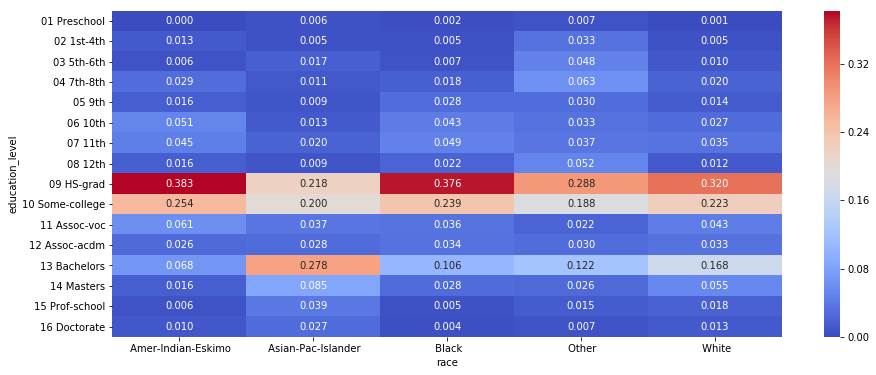

In [309]:
plt.figure(figsize=(15,6))
sns.heatmap(cross, annot=True, fmt=".3f", cmap='coolwarm')

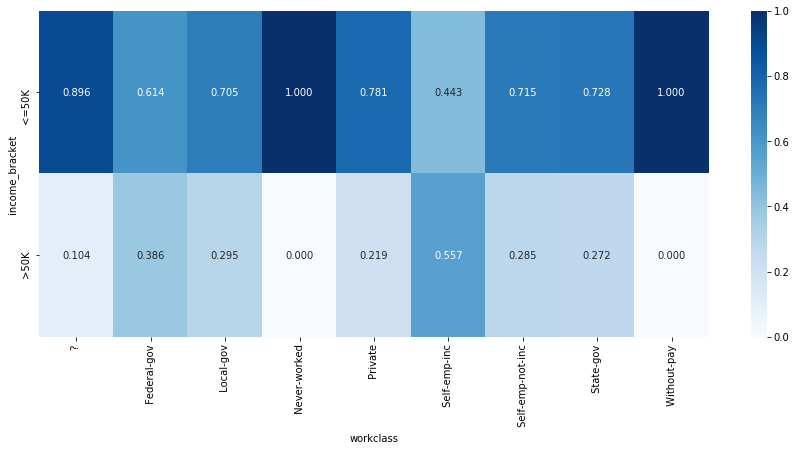

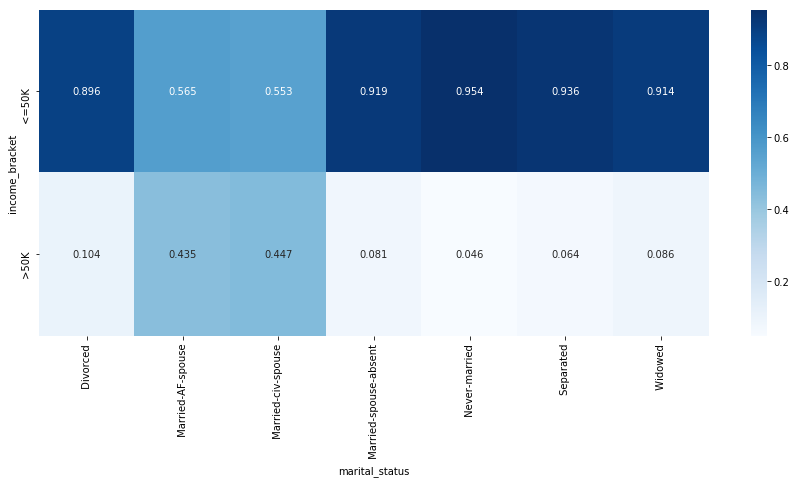

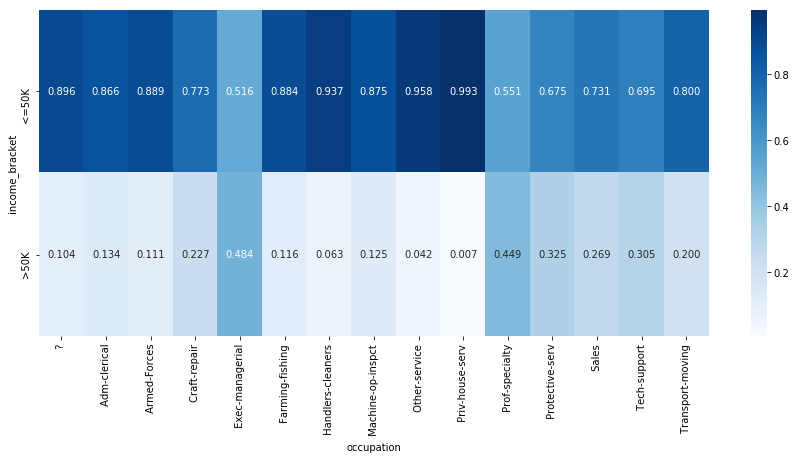

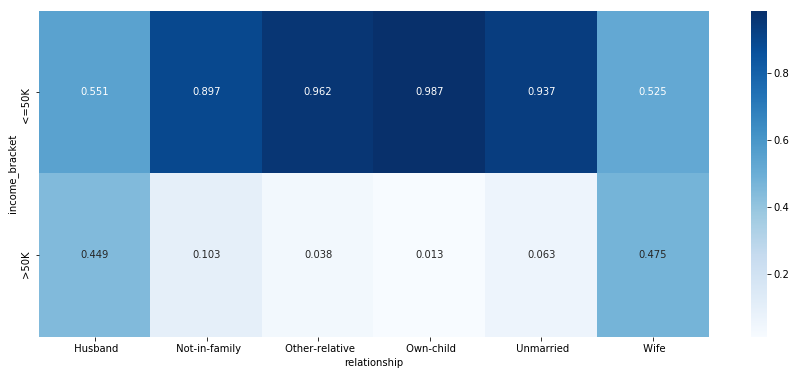

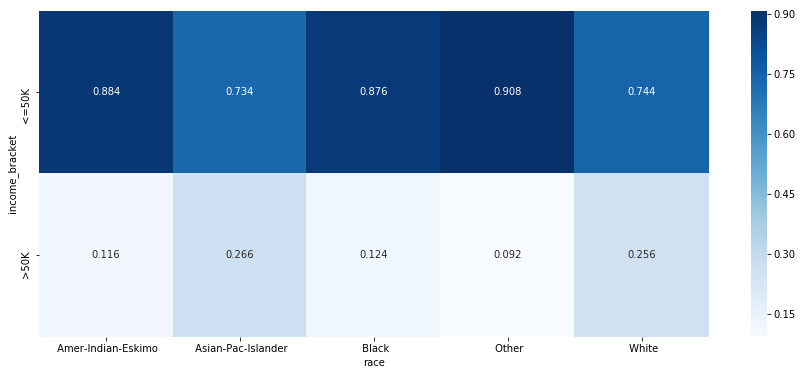

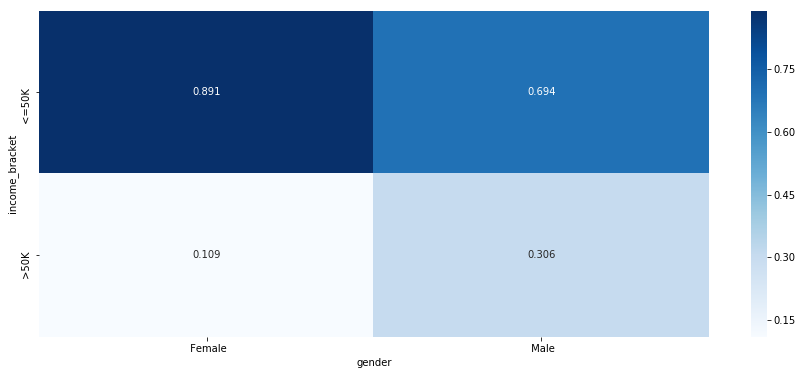

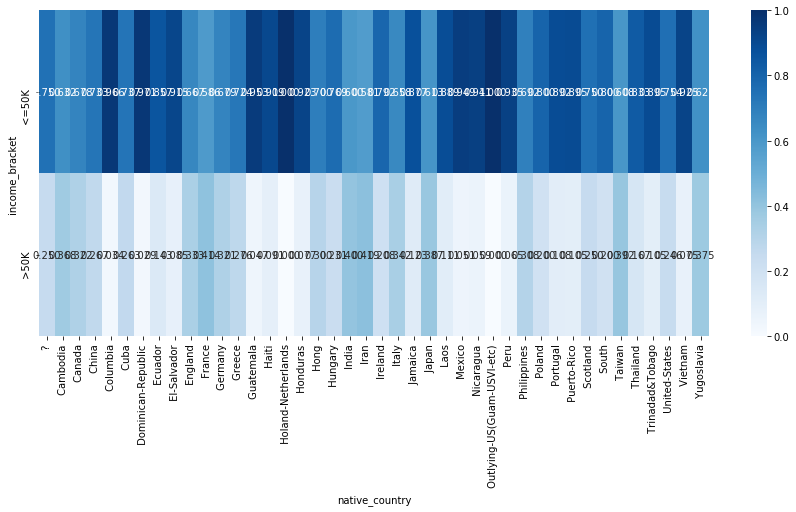

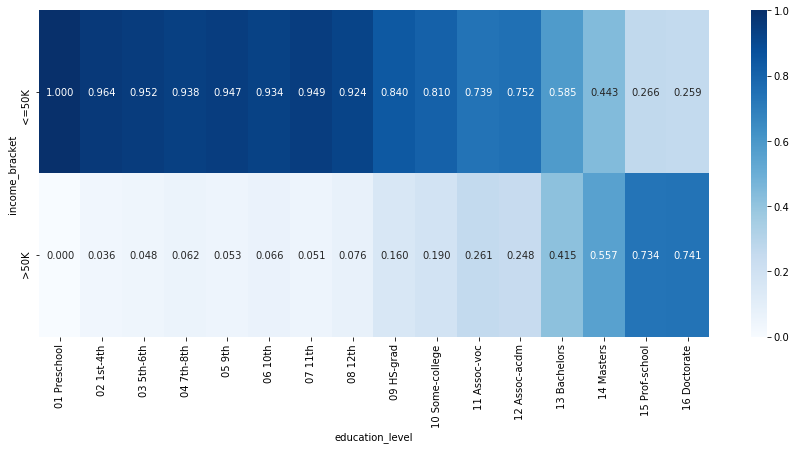

In [381]:
plot_num = 0
cat_cols_list = list(cat_cols)
cat_cols_list.remove('income_bracket')
cat_cols_list.remove('education_num_str')
cat_cols_list.remove('education')
for cat_col in cat_cols_list:
    cross = pd.crosstab(census['income_bracket'],
                        census[cat_col],
                        normalize='columns') 
    plot_num += 1
    plt.figure(cat_col, figsize=(15,6))
    sns.heatmap(cross, annot=True, fmt=".3f", cmap='Blues')

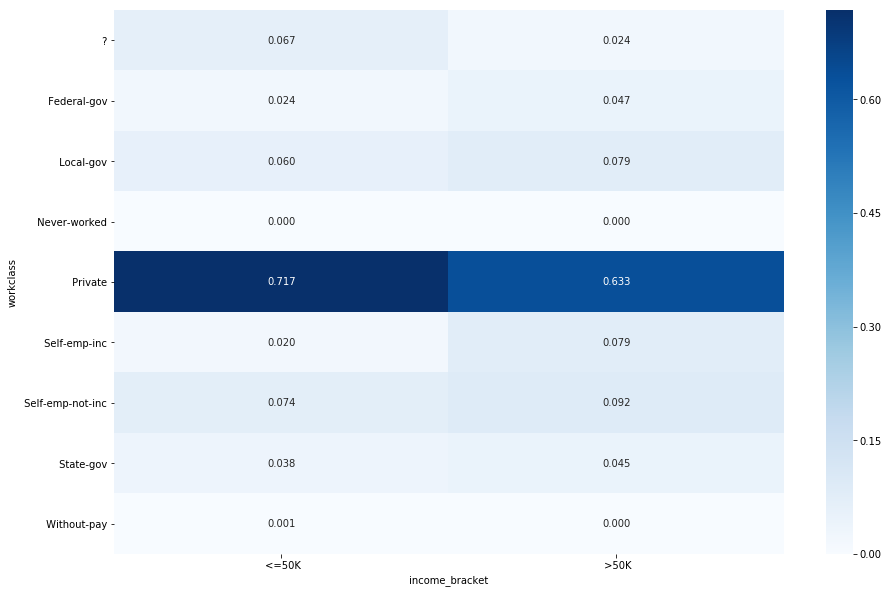

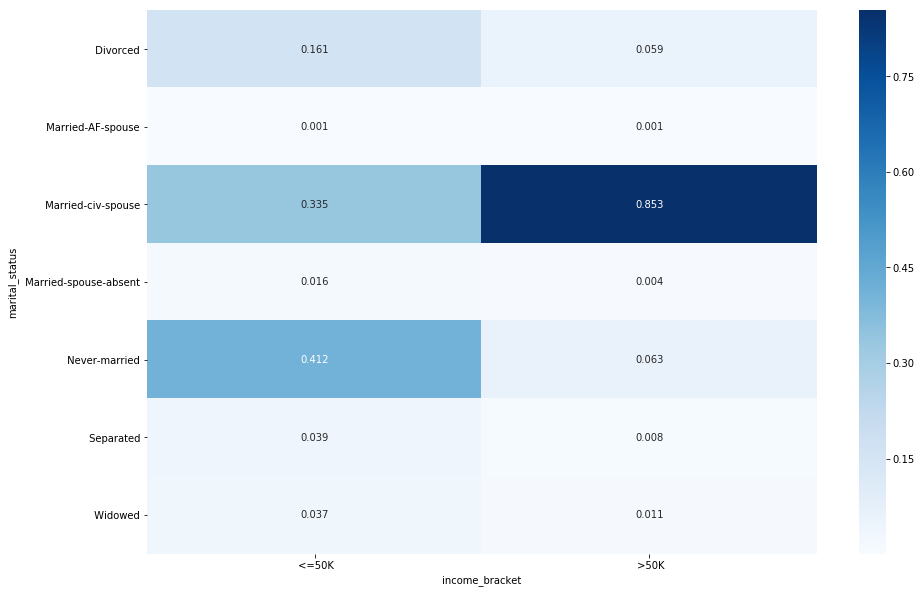

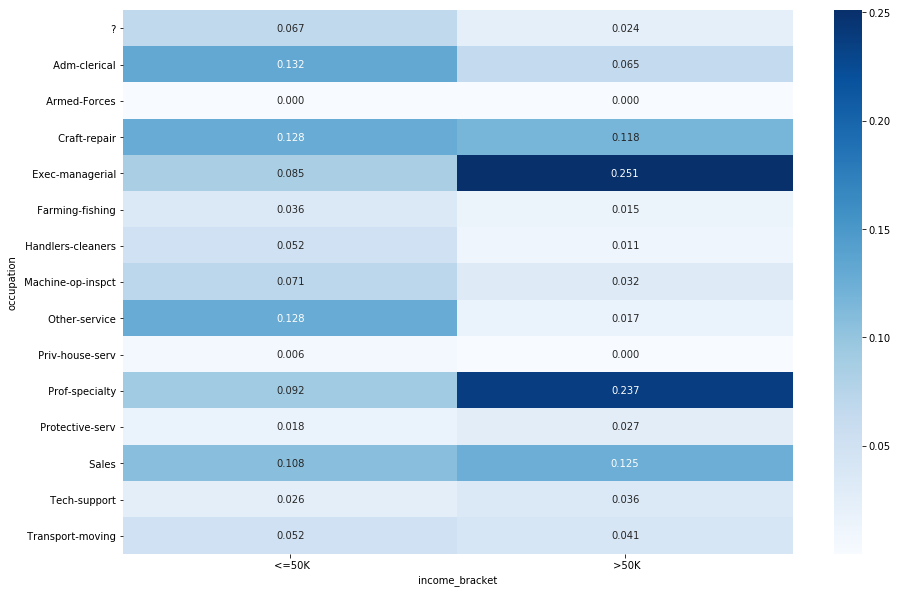

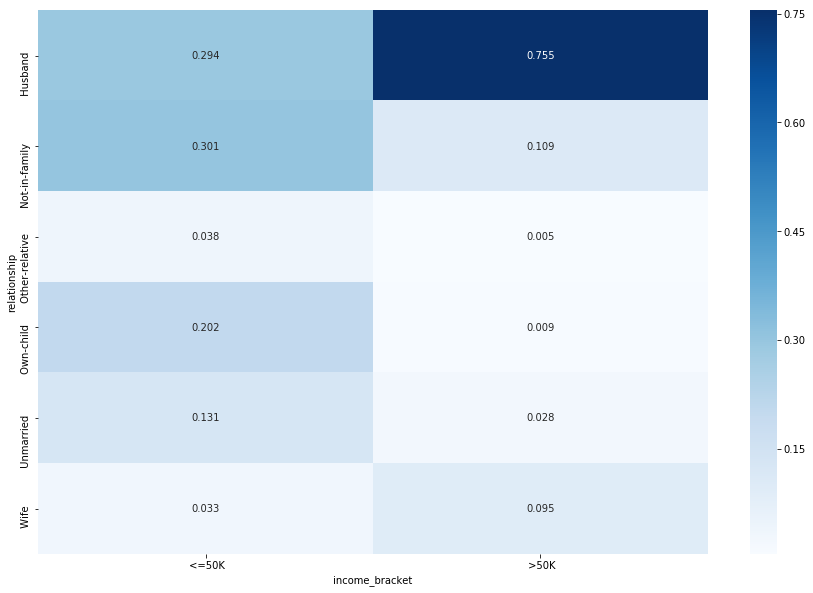

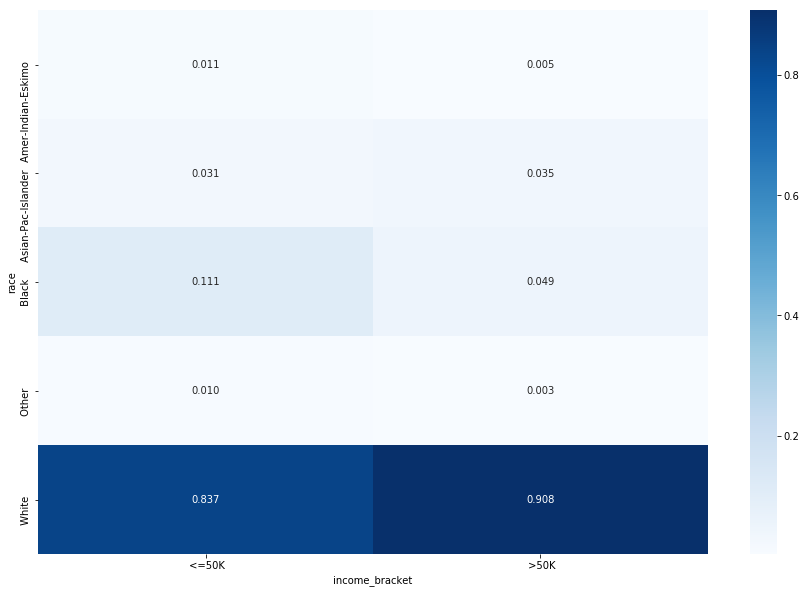

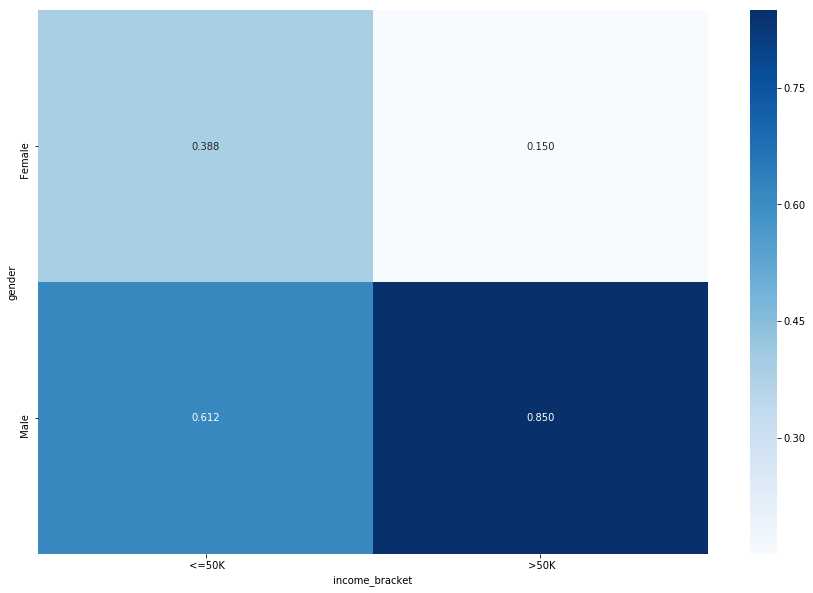

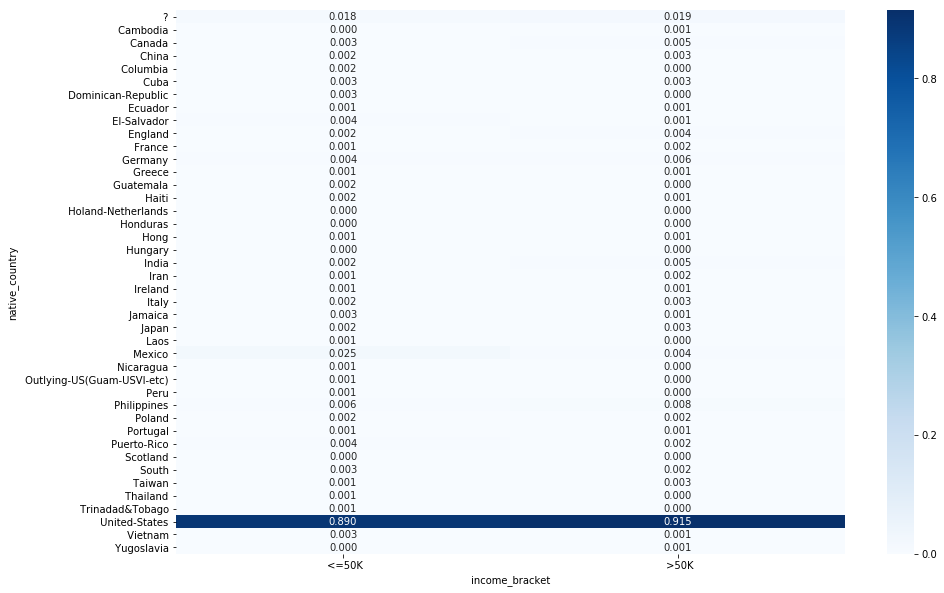

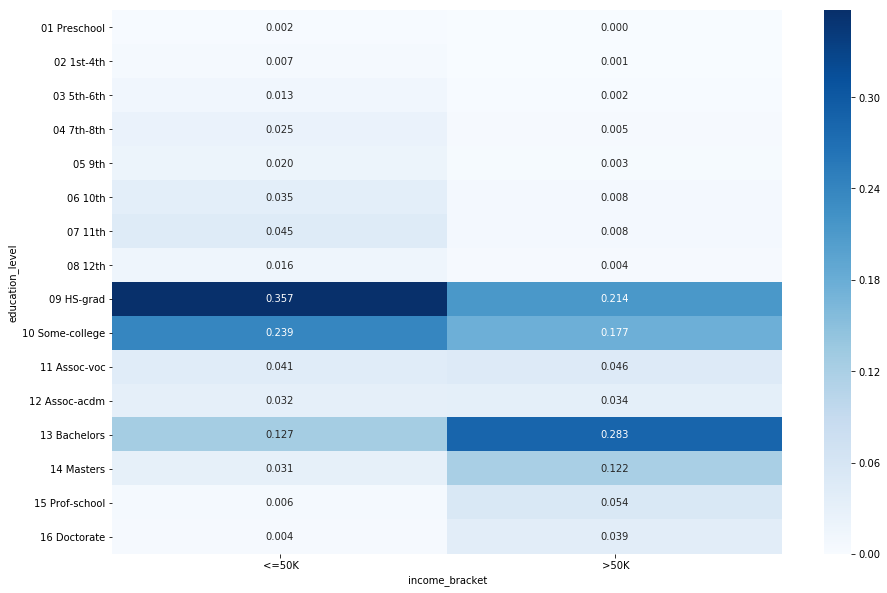

In [383]:
plot_num = 0
cat_cols_list = list(cat_cols)
cat_cols_list.remove('income_bracket')
cat_cols_list.remove('education_num_str')
cat_cols_list.remove('education')
for cat_col in cat_cols_list:
    cross = pd.crosstab(census[cat_col],
                        census['income_bracket'],
                        normalize='columns') 
    plot_num += 1
    plt.figure(cat_col, figsize=(15,10))
    sns.heatmap(cross, annot=True, fmt=".3f", cmap='Blues')

### Prepare features and labels

** TensorFlow won't be able to understand strings as labels, you'll need to use pandas .apply() method to apply a custom function that converts them to 0s and 1s. This might be hard if you aren't very familiar with pandas, so feel free to take a peek at the solutions for this part.**

** Convert the Label column to 0s and 1s instead of strings.**

In [384]:
census['label'] = census['income_bracket'].apply(lambda x: 1 if x ==' >50K' else 0)

In [387]:
y_val = census['label']

### Perform a Train Test Split on the Data

In [431]:
cat_cols_list = list(cat_cols)
cat_cols_list.remove('education_num_str')
cat_cols_list.remove('education_level')
cat_cols_list

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native_country',
 'income_bracket']

In [432]:
num_cols_list = list(num_cols)
num_cols_list

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [434]:
feat_cols = []
for f in cat_cols_list:
    feat_cols.append(f)
for f in num_cols_list:
    feat_cols.append(f)
feat_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native_country',
 'income_bracket',
 'age',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [435]:
x_data = census[feat_cols]

In [437]:
from sklearn.model_selection import train_test_split

In [438]:
X_train, X_test, y_train, y_test = train_test_split(x_data,
                                                    y_val,
                                                    test_size=0.3, 
                                                    random_state=101)

### Create the Feature Columns for tf.esitmator

** Take note of categorical vs continuous values! **

In [445]:
print(num_cols_list)
print('\n')
print(cat_cols_list)

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country', 'income_bracket']


** Import Tensorflow **

In [439]:
import tensorflow as tf

** Create the tf.feature_columns for the categorical values. Use vocabulary lists or just use hash buckets. **

In [472]:
embedded_feat_list = []
for cf in cat_cols_list:
    name_hash = str(cf) + '_h'
    cat_size = len(census.groupby(cf).count().index)
    name_hash = tf.feature_column.categorical_column_with_hash_bucket(cf, hash_bucket_size=cat_size)
    name = str(cf) + '_f'
    name = tf.feature_column.embedding_column(name_hash, dimension=cat_size)
    embedded_feat_list.append(name)

** Create the continuous feature_columns for the continuous values using numeric_column **

In [473]:
continuous_feat_list = []
for nf in num_cols_list:
    name = str(nf) + '_f'
    name = tf.feature_column.numeric_column(nf)
    continuous_feat_list.append(name)

** Put all these variables into a single list with the variable name feat_cols **

In [475]:
feat_cols = embedded_feat_list + continuous_feat_list

### Create Input Function

** Batch_size is up to you. But do make sure to shuffle!**

In [476]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,
                                                 y=y_train,
                                                 batch_size=10,
                                                 num_epochs=100,
                                                 shuffle=True)

#### Create your model with tf.estimator

**Create a LinearClassifier.(If you want to use a DNNClassifier, keep in mind you'll need to create embedded columns out of the cateogrical feature that use strings, check out the previous lecture on this for more info.)**

In [477]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,
                                      n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/kw/sgdsryqs64v1v1c3w2xlklvm0000gn/T/tmpm2yf9ccd', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x13955a438>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


** Train your model on the data, for at least 5000 steps. **

In [478]:
model.train(input_fn=input_func,steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/kw/sgdsryqs64v1v1c3w2xlklvm0000gn/T/tmpm2yf9ccd/model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 139.191
INFO:tensorflow:loss = 5.36348, step = 101 (0.719 sec)
INFO:tensorflow:global_step/sec: 314.387
INFO:tensorflow:loss = 6.80157, step = 201 (0.318 sec)
INFO:tensorflow:global_step/sec: 326.498
INFO:tensorflow:loss = 6.66237, step = 301 (0.306 sec)
INFO:tensorflow:global_step/sec: 375.543
INFO:tensorflow:loss = 171.19, step = 401 (0.266 sec)
INFO:tensorflow:global_step/sec: 88.5242
INFO:tensorflow:loss = 2.1516, step = 501 (1.129 sec)
INFO:tensorflow:global_step/sec: 327.999
INFO:tensorflow:loss = 0.219488, step = 601 (0.305 sec)
INFO:tensorflow:global_step/

### Evaluation

** Create a prediction input function. Remember to only supprt X_test data and keep shuffle=False. **

In [479]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                      y=y_test,
                                                      batch_size=10,
                                                      num_epochs=1,
                                                          shuffle=False)

In [483]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-11-06:59:00
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/kw/sgdsryqs64v1v1c3w2xlklvm0000gn/T/tmpm2yf9ccd/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-11-06:59:03
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.816358, accuracy_baseline = 0.761183, auc = 0.844144, auc_precision_recall = 0.628227, average_loss = 1.31615, global_step = 5000, label/mean = 0.238817, loss = 13.1602, precision = 0.614925, prediction/mean = 0.290891, recall = 0.618088


** Use model.predict() and pass in your input function. This will produce a generator of predictions, which you can then transform into a list, with list() **

In [491]:
predictions = model.predict(eval_input_func)

** Each item in your list will look like this: **

In [482]:
list(predictions)[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/kw/sgdsryqs64v1v1c3w2xlklvm0000gn/T/tmpm2yf9ccd/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([-1.01075757], dtype=float32),
 'logistic': array([ 0.26683164], dtype=float32),
 'probabilities': array([ 0.73316842,  0.26683164], dtype=float32),
 'class_ids': array([0]),
 'classes': array([b'0'], dtype=object)}

** Create a list of only the class_ids key values from the prediction list of dictionaries, these are the predictions you will use to compare against the real y_test values. **

In [495]:
predictions = model.predict(eval_input_func)
final_preds = []

for pred in predictions:
    final_preds.append(pred['class_ids'][0])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/kw/sgdsryqs64v1v1c3w2xlklvm0000gn/T/tmpm2yf9ccd/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [498]:
print(final_preds[0:10])

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


** Import classification_report from sklearn.metrics and then see if you can figure out how to use it to easily get a full report of your model's performance on the test data. **

In [484]:
from sklearn.metrics import classification_report

In [501]:
print(classification_report(y_test, final_preds))

             precision    recall  f1-score   support

          0       0.88      0.88      0.88      7436
          1       0.61      0.62      0.62      2333

avg / total       0.82      0.82      0.82      9769



# Great Job!